# GMT234 DIGITAL IMAGING AND INTERPRETATION 
# Asingment 1

## All codes are given below with their explanations.

## Preparation Phase

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

## 1. Quastion's Solutions

### Part A

In [2]:
# First, we start with image reading.

sarikamis = cv2.imread('Sarikamis.jpg')

cv2.imshow('Sarikamis',sarikamis)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
# and then we split the image into bands,
b, g, r = cv2.split(sarikamis)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# this is another separation process

img_B = sarikamis[:,:,0]
img_G = sarikamis[:,:,1]
img_R = sarikamis[:,:,2]

cv2.imshow('img_B',img_B)
cv2.imshow('img_G',img_G)
cv2.imshow('img_R',img_R)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# In this part, we save the images we have separated in the format we want.

cv2.imwrite('Sarikamis_Red.tiff',img_R)
cv2.imwrite('Sarikamis_Green.tiff',img_G)
cv2.imwrite('Sarikamis_Blue.tiff',img_B)

True

In [6]:
# Convert jpg to tiff in Pillow

im = Image.open('Sarikamis.jpg')
im.save("Sarikamis.tiff",'TIFF')

image = cv2.imread('Sarikamis.tiff')

cv2.imshow('Sarikamis',image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
# the process of reading the images we translate

sarikamis_red = cv2.imread('Sarikamis_Red.tiff')
sarikamis_green = cv2.imread('Sarikamis_Green.tiff')
sarikamis_blue = cv2.imread('Sarikamis_Blue.tiff')

### Part B

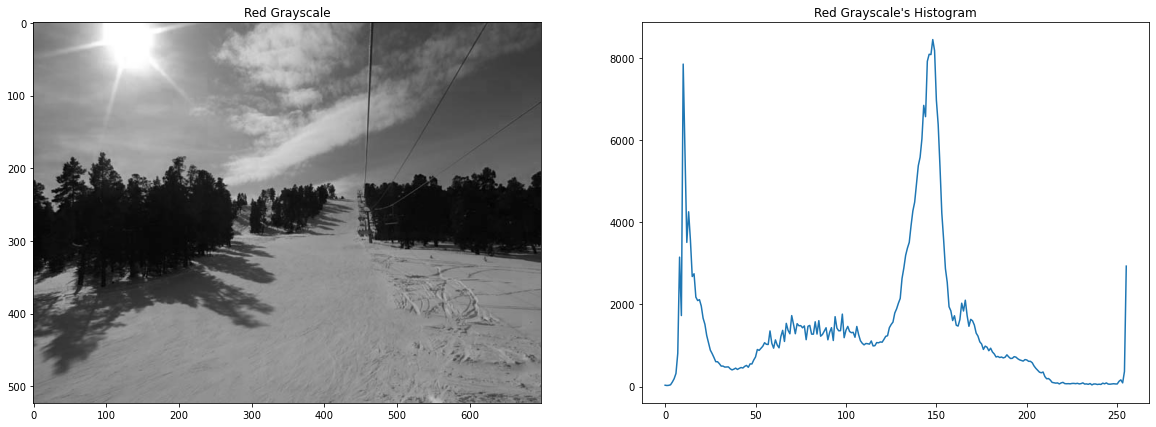

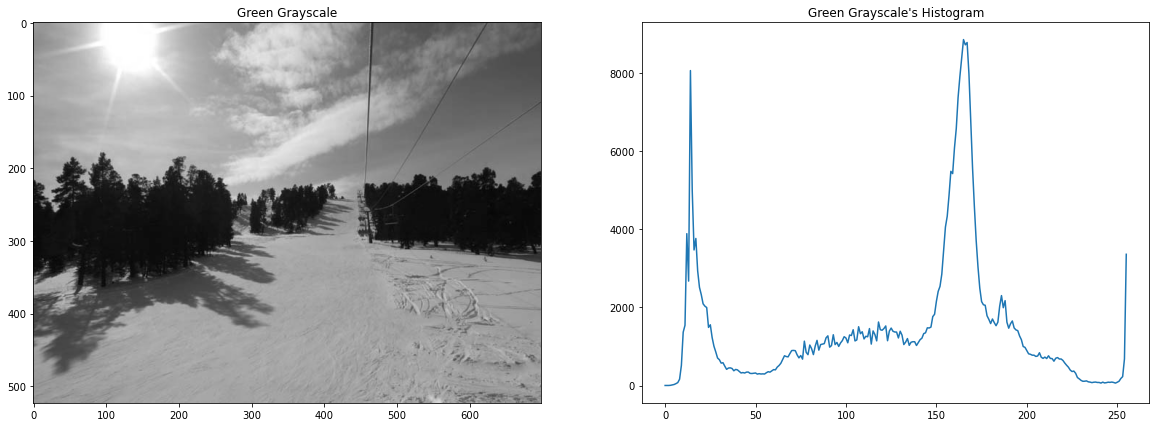

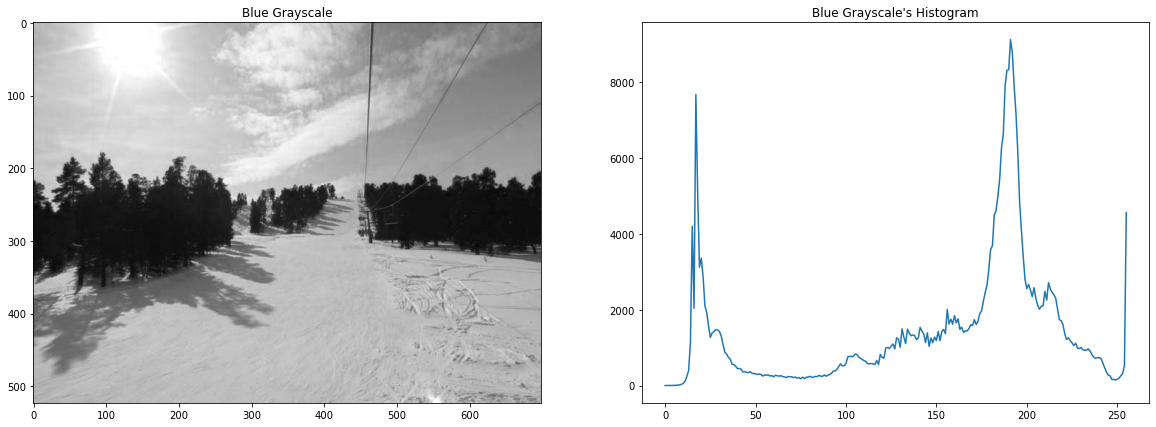

In [8]:
# In this section, we display the histograms of the images that we have separated as rgb and saved with the help of matplotlib.

histogram_red = cv2.calcHist([sarikamis_red],[0],None,[256],[0,256])

plt.figure(figsize = (20,7))
plt.subplot(121)
plt.title("Red Grayscale")
plt.imshow(sarikamis_red)
plt.subplot(122)
plt.title("Red Grayscale's Histogram")
plt.plot(histogram_red)

histogram_green = cv2.calcHist([sarikamis_green],[0],None,[256],[0,256])

plt.figure(figsize = (20,7))
plt.subplot(121)
plt.title("Green Grayscale")
plt.imshow(sarikamis_green)
plt.subplot(122)
plt.title("Green Grayscale's Histogram")
plt.plot(histogram_green)

histogram_blue = cv2.calcHist([sarikamis_blue],[0],None,[256],[0,256])

plt.figure(figsize = (20,7))
plt.subplot(121)
plt.imshow(sarikamis_blue)
plt.title('Blue Grayscale')
plt.subplot(122)
plt.title("Blue Grayscale's Histogram")
plt.plot(histogram_blue)


### Part C

In [19]:
# In this section, we added the value 60 to all RGB images. Then we combined these images to get a new image.

red_tint = 60
green_tint = 60
blue_tint = 60
img = Image.open('Sarikamis.tiff')
red, green, blue = img.split()

# loop to add values to images
for y in range(img.height):
    for x in range(img.width):
        value = img.getpixel((x, y))
        new_color = (value[0] + red_tint, value[1] + green_tint, value[2] + blue_tint)
        img.putpixel((x, y), new_color)
img.save('New_Sarikamis.tiff')

new_sarikamis = cv2.imread('New_Sarikamis.tiff')

cv2.imshow('New_Sarikamis',new_sarikamis)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Part D

In [21]:
# In this section, we applied threshold to the image in order to count the pixel values of the pine trees in the image
# and then we obtained the pixel values of the pine trees.

img = cv2.imread("Sarikamis_Red.tiff",0)

height = img.shape[0]
width = img.shape[1]

img_thres= np.zeros((height,width))
n_pix = 0
T = 26 # threshold value

# threshold code
for y in range(height):
    for x in range(width):
        pixel = img[y,x]
        if pixel < T:
            n_pix = 0
        else:
            n_pix = 255
            
        img_thres[y,x] = n_pix
        
cv2.imshow("Thresholding Image", img_thres)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
number_of_Tree_pix = np.sum(img_thres == 0)
print('Number of Tree Pixels: ',number_of_Tree_pix)

Number of Tree Pixels:  51428


## 2. Question's Solution

In [23]:
#In this question, we extracted the image from the background and obtained the images of the cars.

image_highway1 = cv2.imread('image0.png',0)
image_highway2 = cv2.imread('image1.png',0)

image_highway3 = cv2.absdiff(image_highway2, image_highway1) #In order to make the extraction process more accurate, we got help from opencv.

cv2.imshow('Cars',image_highway3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
image_highway3.shape

(240, 320)

In [24]:
# here we applied threshold to our image.

#I used ready threshold code here because I showed how to write threshold code without ready libraries in the previous question.
#I didn't want to make unnecessary code clutter here.

ret, thresh = cv2.threshold(image_highway3, 50, 255, cv2.THRESH_BINARY) 
cv2.imshow('Thresholded', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# here, we made edge widening and made our pixels easier to see.

kernel = np.ones((3,3),np.uint8)

dilated = cv2.dilate(thresh,kernel,iterations = 1)

cv2.imshow('Dilated', dilated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# here, we divided the total bright pixels by the average car pixels and reached the approximate number of cars.

number_of_cars = int(np.sum(thresh == 255)/400)
print("Total Cars:", number_of_cars)

Total Cars: 4


## 3. Question's Solution

In this question, we were asked to correct the distortions in the image. smoothing filters should be used for this task. What we use here are Averaging Filter and Median Filter. Both filters are used to correct image artifacts and soften the image.

### Averaging Filter

In [25]:
img = cv2.imread('Portrait_of_a_Young_Woman.jpg', 0)
 
# Obtain number of rows and columns
# of the image
m, n = img.shape
  
# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9
  
# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
img_new = img_new.astype(np.uint8)
cv2.imwrite('blurred.tiff', img_new)

cv2.imshow('Blurred',img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### In the above example, it is observed that the filtered image is slightly blurred. If we increase the size of the averaging mask, more blurring can be obtained. 

### Median Filter

In [26]:
img_noisy1 = cv2.imread('Portrait_of_a_Young_Woman.jpg', 0)
 
# Obtain the nuSmber of rows and columns
# of the image
m, n = img_noisy1.shape
  
# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],
               img_noisy1[i-1, j],
               img_noisy1[i-1, j + 1],
               img_noisy1[i, j-1],
               img_noisy1[i, j],
               img_noisy1[i, j + 1],
               img_noisy1[i + 1, j-1],
               img_noisy1[i + 1, j],
               img_noisy1[i + 1, j + 1]]
         
        temp = sorted(temp)
        img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.tiff', img_new1)

cv2.imshow('Median Filtered',img_new1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### In the above example, we can see that the median filtered image is considerably enhanced with hardly any salt and pepper noise in it.